### Data Set Setup ###

In [19]:
library(dplyr)
library(tidyr)
library(ggplot2)

county = read.table("county_complete1.csv", sep = ",", header = TRUE)


ca = filter(county, state =="California")

# Selected variables to use for analysis
ca_poverty = select(ca, 'name','pop2016', 'pop2017', 'pop_2019', 'poverty_age_under_18_2017', 
                      'poverty_under_18_2019', 'poverty_2016', 'poverty_2017', 'poverty_2019',
                       'median_household_income_2016', 'median_household_income_2017', 
                      'median_household_income_2019', 'hs_grad_2016', 'hs_grad_2017', 
                     'hs_grad_2019', 'bachelors_2016', 'bachelors_2017', 'bachelors_2019', 
                     'unemployment_rate_2017', 'unemployment_rate_2019', 'uninsured_2017', 'uninsured_2019',
                      'uninsured_age_under_19_2017', 'uninsured_under_19_2019', 
                      'per_capita_income_2017','per_capita_income_2019')

# Loading 2016, 2017, 2019 poverty demographics dataset
# Each variable consists of deeper view of the demographics of the population experiencing poverty

demo2016 = read.table("2016_poverty_demographics.csv", sep = ",", header = TRUE)
demo2017 = read.table("2017_poverty_demographics.csv", sep = ",", header = TRUE)
demo2018 = read.table("2018_poverty_demographics.csv", sep = ",", header = TRUE)
demo2019 = read.table("2019_poverty_demographics.csv", sep = ",", header = TRUE)

ca_demo2016 = filter(demo2016, state == 'California')
ca_demo2017 = filter(demo2017, state == 'California')
ca_demo2018 = filter(demo2018, state == 'California')
ca_demo2019 = filter(demo2019, state == 'California')

#Increase scale of graph
options(repr.plot.width=15, repr.plot.height=8)

#To remove scientific notation in graph 
options(scipen=10000)

### Cutting Graph for 2019 Citizens under 18 that are in Poverty ###

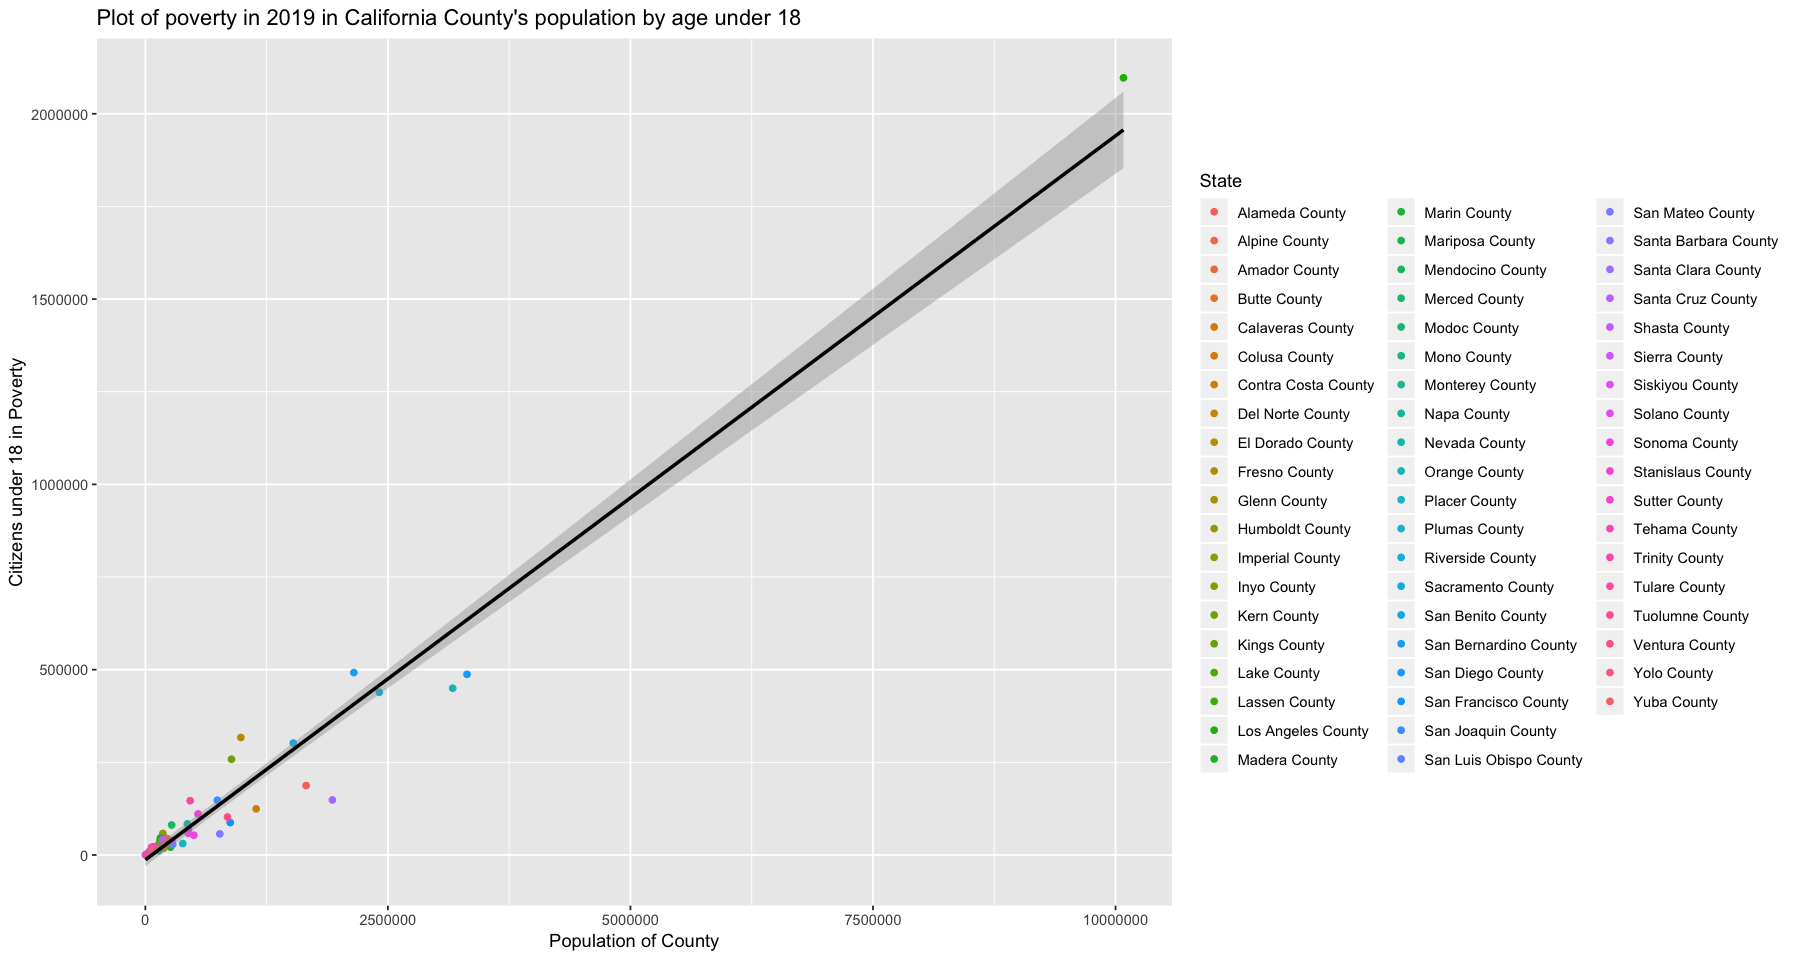

In [24]:
#To remove scientific notation in graph 
options(scipen=10000)


# Selecting State, Population of 2019, and Poverty under 18 in the 2019 population columns
poverty18 = select(ca_poverty, c('name','pop_2019', 'poverty_under_18_2019'))

# Replacing the NA's to the mean of all the poverty levels under 18 in 2019  
poverty18$poverty_under_18_2019[is.na(poverty18$poverty_under_18_2019)] = 0
xbar = mean(poverty18$poverty_under_18_2019)
poverty18[poverty18 == 0] = xbar 


#Adjust the Poverty rate under 18 to correct values because poverty under 18 is in %'s
poverty18$updated = (poverty18$pop_2019 * poverty18$poverty_under_18_2019)/100

# Plot graph in terms of Population in 2019 for each state by poverty under 18 in each state 
plot1 =ggplot(poverty18, aes(poverty18$pop_2019, poverty18$updated, color=poverty18$name)) + 
geom_point() +
stat_smooth(method = "lm", col = "black") +
ggtitle("Plot of poverty in 2019 in California County's population by age under 18 ") +
xlab("Population of County") + 
ylab("Citizens under 18 in Poverty") + labs(color = "State"); 

#Increase scale of graph
options(repr.plot.width=15, repr.plot.height=8)

#Plot graph 
plot1

### Graphs for Median household in 2019, % under 18 in Poverty, and Hist ###

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

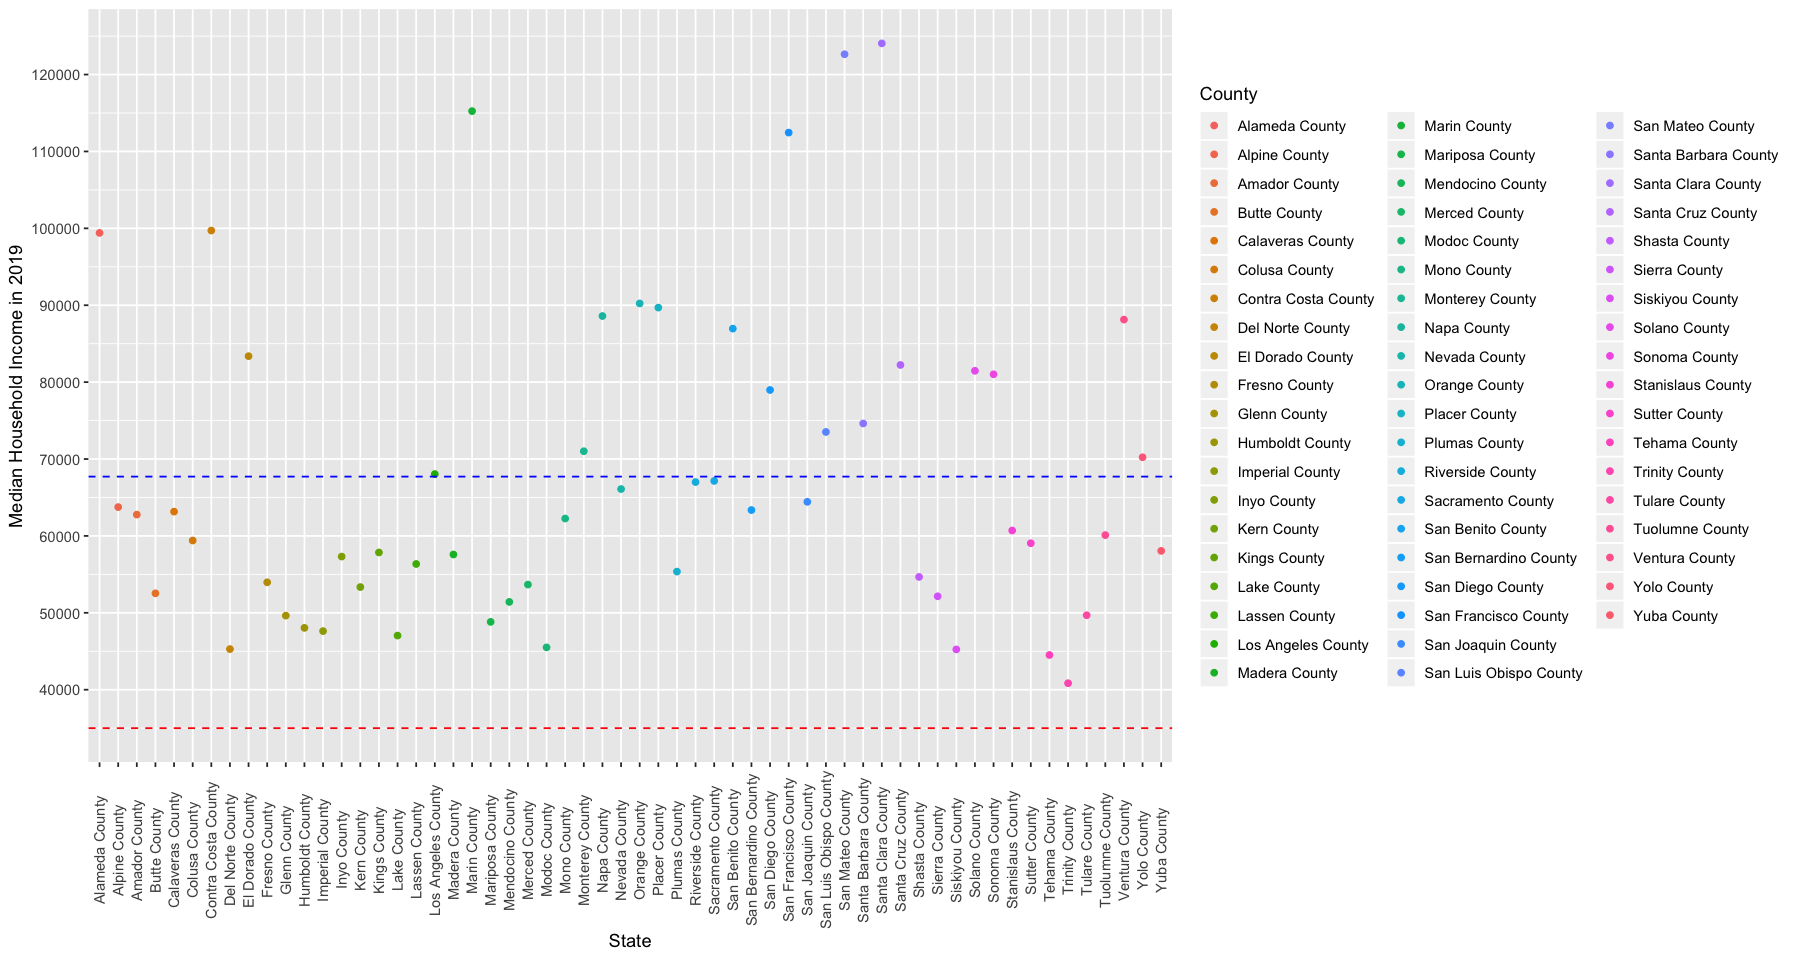

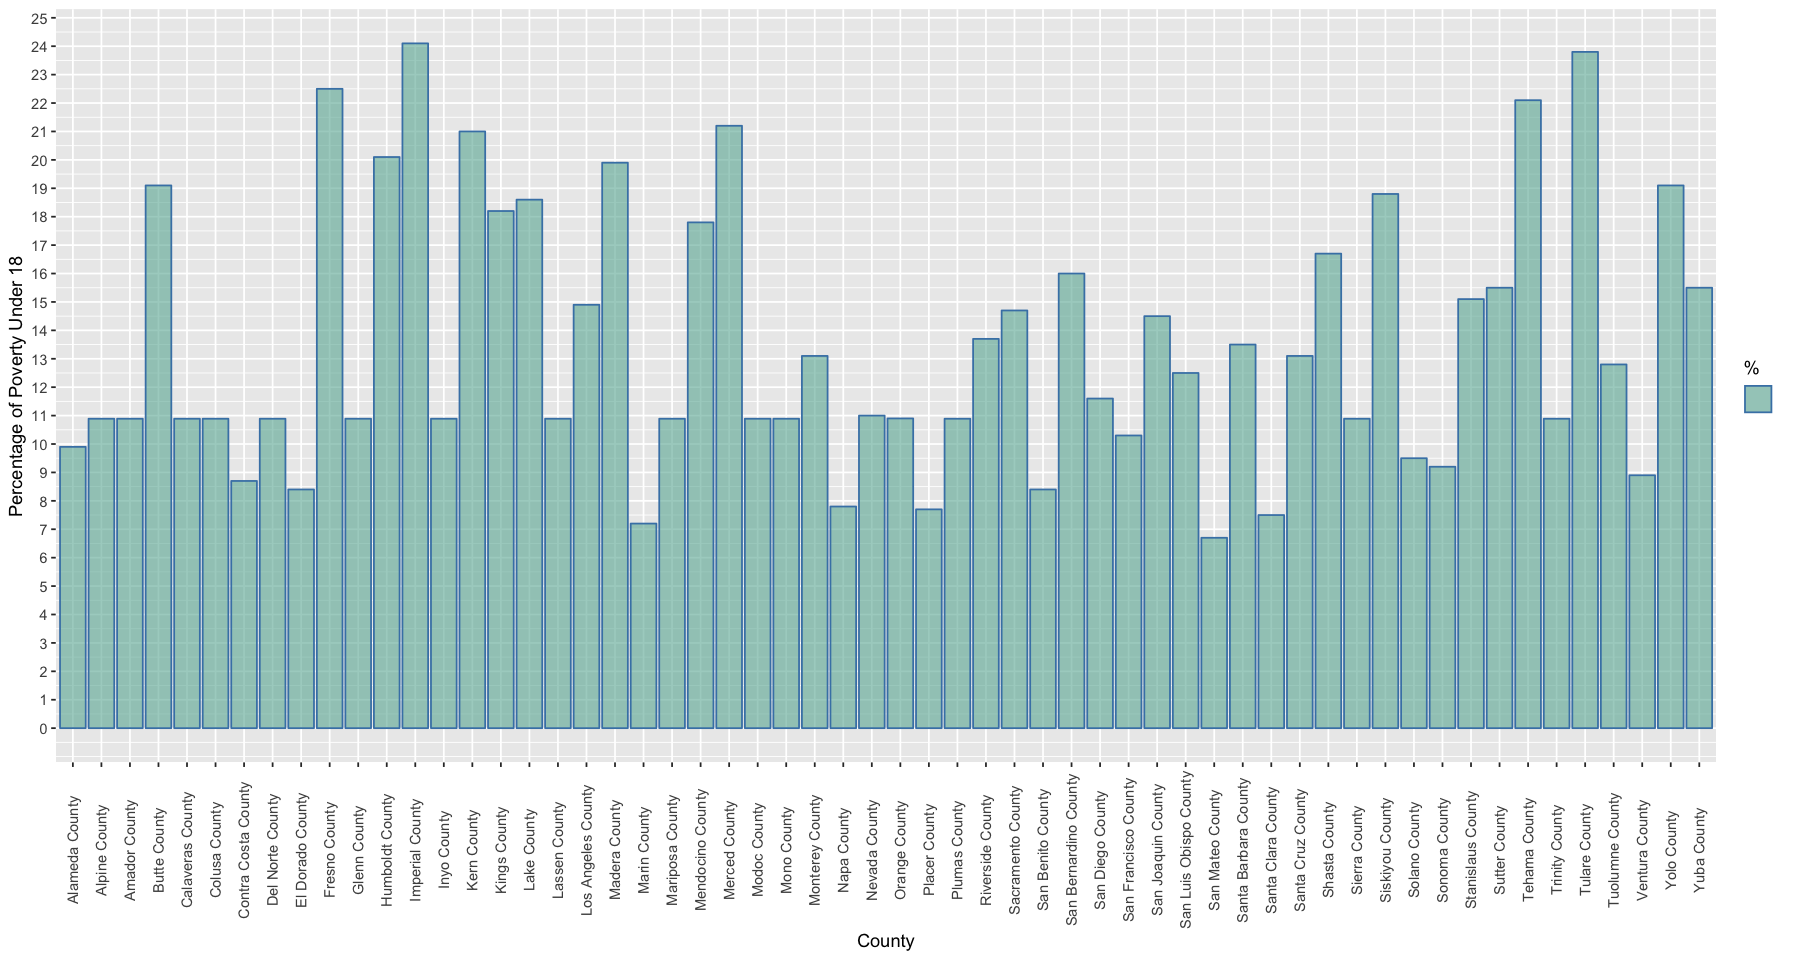

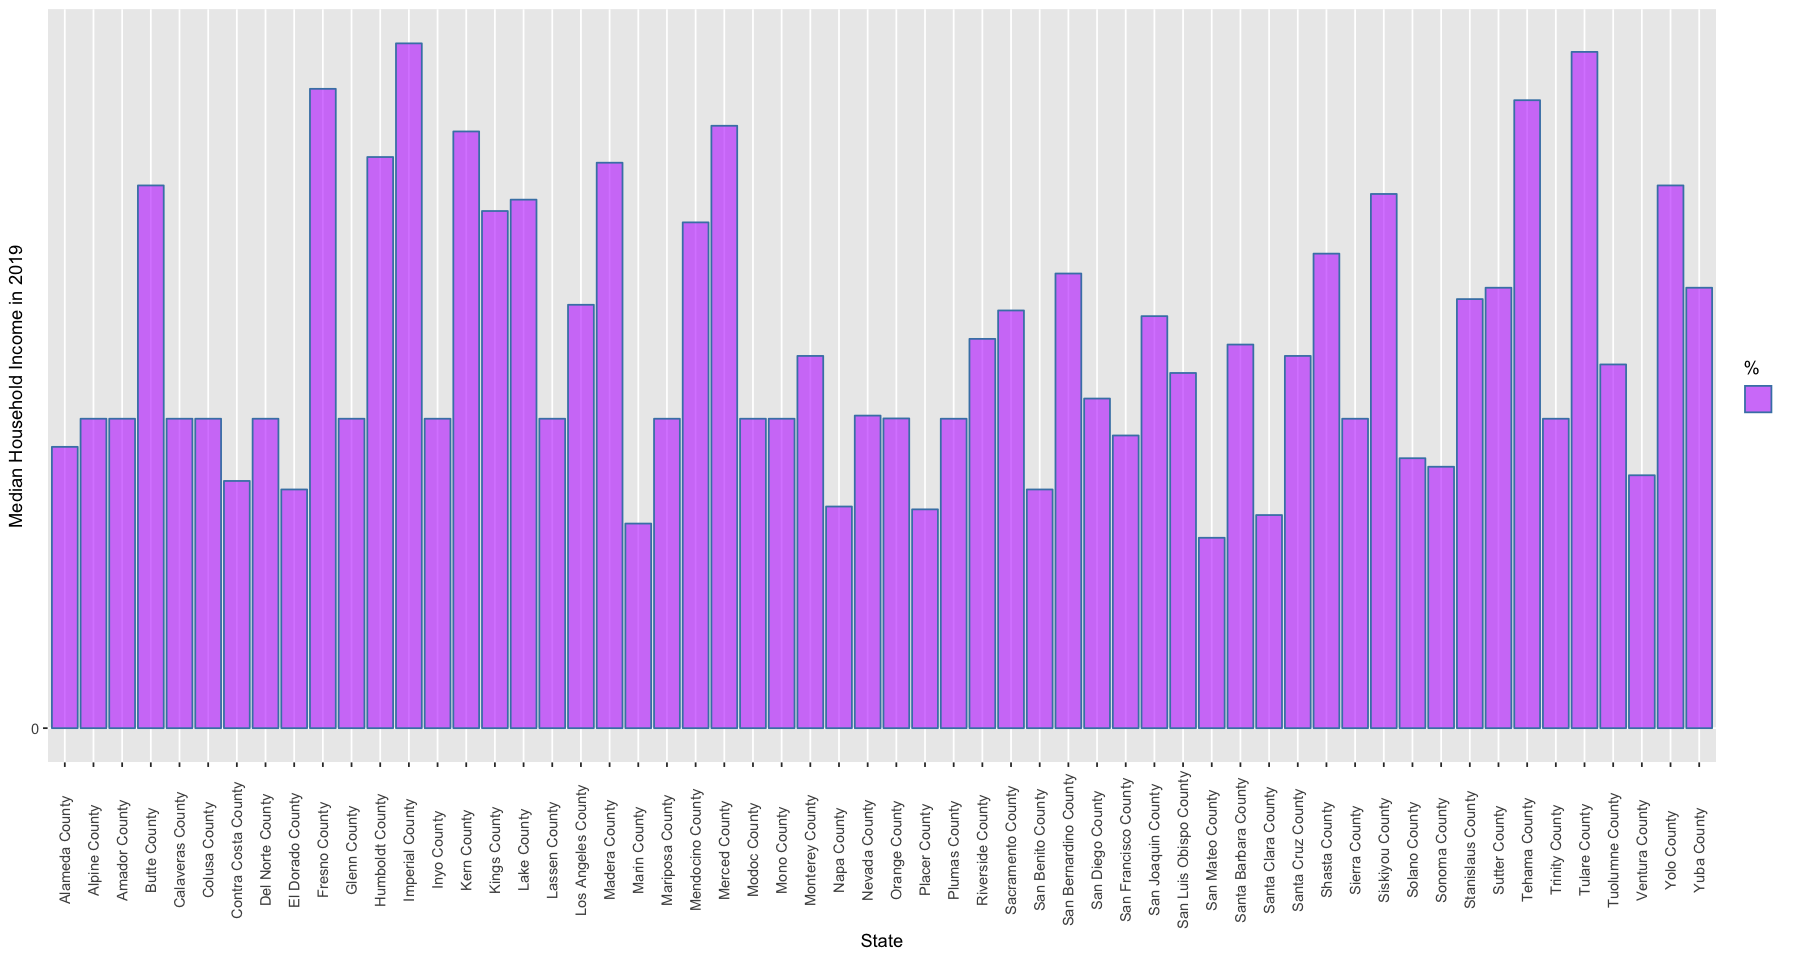

In [23]:
#To remove scientific notation 
options(scipen=10000)

house = select(ca, persons_per_household_2019)
houseBar = colMeans(house)
income = select(ca, median_household_income_2019)
inBar = colMeans(income);

povertLevel = 35000

ca$update = ca_demo2019$under_age_18_poverty/ca$pop_2019

caPov19 = select(ca, name, poverty_2019)


# Replacing the NA's to the mean of all the poverty levels under 18 in 2019  
caPov19$poverty_2019[is.na(caPov19$poverty_2019)] = 0
xbar = mean(caPov19$poverty_2019)
caPov19[caPov19 == 0] = xbar

#Plot median household income for 2019
plot2 <- ggplot(ca, aes(ca$name, ca$median_household_income_2019,color=ca$name)) + 
geom_point() + geom_hline(yintercept=povertLevel, linetype="dashed", color = "red") + 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
geom_hline(yintercept=inBar, linetype="dashed", color = "blue") + 
xlab("State") +
ylab("Median Household Income in 2019") + labs(color = "County") + 
scale_y_continuous(breaks=seq(0,120000,10000))

#Plot 2019 for California's % under 18 in poverty 
plot3 <- ggplot(ca, aes(ca$name, caPov19$poverty_2019, fill='')) + 
geom_histogram(color="steelblue", alpha=0.6, stat = 'identity') +
scale_fill_manual(values=c("#69b3a2")) + 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
xlab("County") +
ylab("Percentage of Poverty Under 18") + labs(color = "County") + 
labs(fill = "%") +
scale_y_continuous(breaks=seq(0,100))

#Histogram of % of population that are in poverty (by county)
plot4 <- ggplot(caPov19, aes(caPov19$name, caPov19$poverty_2019,fill = '')) + 
geom_histogram(color="steelblue", alpha=0.6, stat = 'identity') +
scale_fill_manual(values=c("darkorchid1")) + 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
xlab("State") +
ylab("Median Household Income in 2019") + labs(color = "State") + 
labs(fill = "%") +
scale_y_continuous(breaks=seq(0,120000,10000))

# Plotting all plots
plot2; 
plot3; 
plot4; 

### Graph of Different Age groups in Poverty (2016, 2017, 2018, 2019) ###

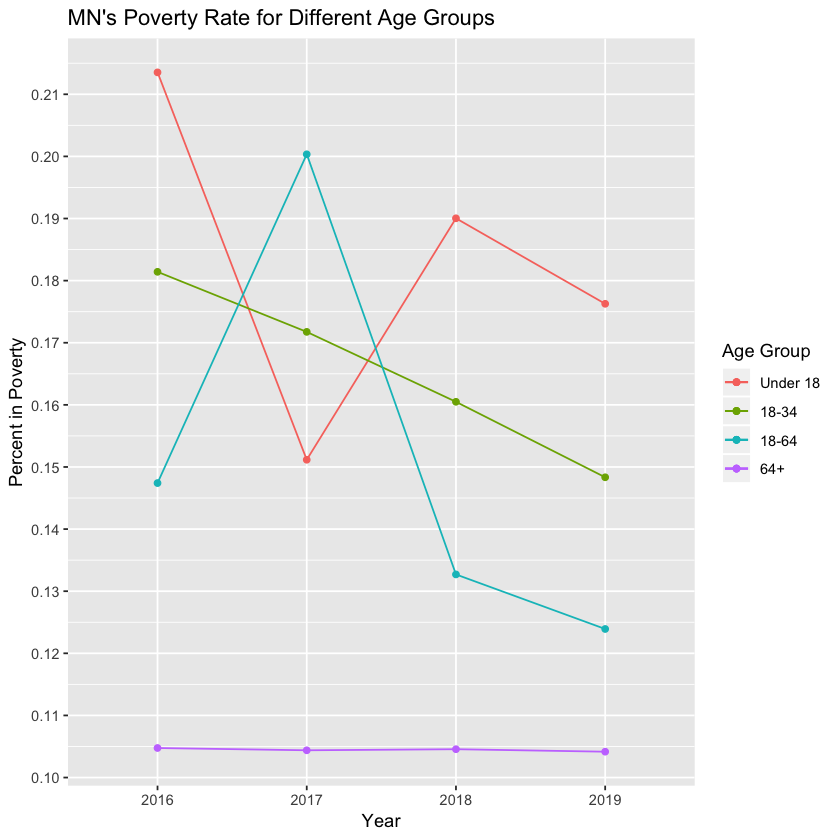

In [10]:
# Age groups that are below poverty 2016, 2017, 2018, 2019
age16 = select(ca_demo2016, 'under_age_18_poverty', 
                            'under_age_5_poverty', 
                            'age_18_to_64_poverty', 
                            'age_65_and_older_poverty', 
                            'age_18_to_34_poverty')
age17 = select(ca_demo2017, 'under_age_18_poverty', 
                            'under_age_5_poverty', 
                            'age_18_to_64_poverty', 
                            'age_65_and_older_poverty', 
                            'age_18_to_34_poverty')
age18 = select(ca_demo2018, 'under_age_18_poverty', 
                            'under_age_5_poverty', 
                            'age_18_to_64_poverty', 
                            'age_65_and_older_poverty', 
                            'age_18_to_34_poverty')
age19 = select(ca_demo2019, 'under_age_18_poverty', 
                            'under_age_5_poverty', 
                            'age_18_to_64_poverty', 
                            'age_65_and_older_poverty', 
                            'age_18_to_34_poverty')

# Adjusting the Povert rate for different age groups
scale16 = age16 * ca$pop2016; 
scale17 = age17 * ca$pop2017; 
scale18 = age18 * ca_demo2018$pop2018; 
scale19 = age19 * ca$pop_2019; 

#Total Population for the whole state of each year
total_16 = sum(ca$pop2016); 
total_17 = sum(ca$pop2017); 
total_18 = sum(ca_demo2018$pop2018); 
total_19 = sum(ca$pop_2019); 

# Creating vectors for different ages of poverty, first, 
# taking the sum of each column.
# Then divide by the total population in order to obtain 
# the total % of the WHOLE state.

a1 = c(sum(scale16$under_age_18_poverty)/total_16, 
       sum(scale17$under_age_18_poverty)/total_17, 
        sum(scale18$under_age_18_poverty)/total_18,
       sum(scale19$under_age_18_poverty)/total_19); 

a2 = c(sum(scale16$age_18_to_34_poverty)/total_16,
       sum(scale17$age_18_to_34_poverty)/total_17,
       sum(scale18$age_18_to_34_poverty)/total_18,
       sum(scale19$age_18_to_34_poverty)/total_19); 

a3 = c(sum(scale16$age_18_to_64_poverty)/total_16, 
       sum(scale17$age_18_to_64_poverty)/total_17,
       sum(scale18$age_18_to_64_poverty)/total_18,
       sum(scale19$age_18_to_64_poverty)/total_19); 

a4 = c(sum(scale16$age_65_and_older_poverty)/total_16,
       sum(scale17$age_65_and_older_poverty)/total_17,
       sum(scale18$age_65_and_older_poverty)/total_18,
       sum(scale19$age_65_and_older_poverty)/total_19); 


# Each year the data was collected
Year = c("2016", "2017", "2018", "2019")

# Dataframe of the data
df1 = data.frame(Year, a1, a2, a3, a4)

p1 <- ggplot(data = df1, aes(x = Year)) +
        # Coral plot: "CA's Poverty Rate Age: Under 18"
        geom_point(aes( y = a1, group = 1, color = 'a1')) +
        geom_line(aes( y = a1, group = 1, color = 'a1')) +

        # Black plot: "CA's Poverty Rate Age: 18-34"
        geom_point(aes( y = a2, group = 1, color = 'a2')) +
        geom_line(aes( y = a2, group = 1, color = 'a2')) +

        # Blue plot: "CA's Poverty Rate Age: 18-64"
        geom_point(aes( y = a3, group = 1, color = 'a3')) +
        geom_line(aes( y = a3, group = 1, color = 'a3')) +
        
        # Green plot: "CA's Poverty Rate Age: 65+"
        geom_point(aes(y = a4, group = 1, color = 'a4')) +
        geom_line(aes(y = a4, group = 1, color = 'a4')) +
        scale_y_continuous(breaks=seq(0,1, 0.01)) + ylab("Percent in Poverty") +
        scale_colour_discrete(name  = "Age Group",
                            breaks=c("a1", "a2", "a3", "a4"),
                            labels=c("Under 18", "18-34", "18-64", "64+")) +       
        ggtitle("MN's Poverty Rate for Different Age Groups")
p1


### Graph of Different Ethnicities in Poverty 2016, 2017, 2018, 2019 ###

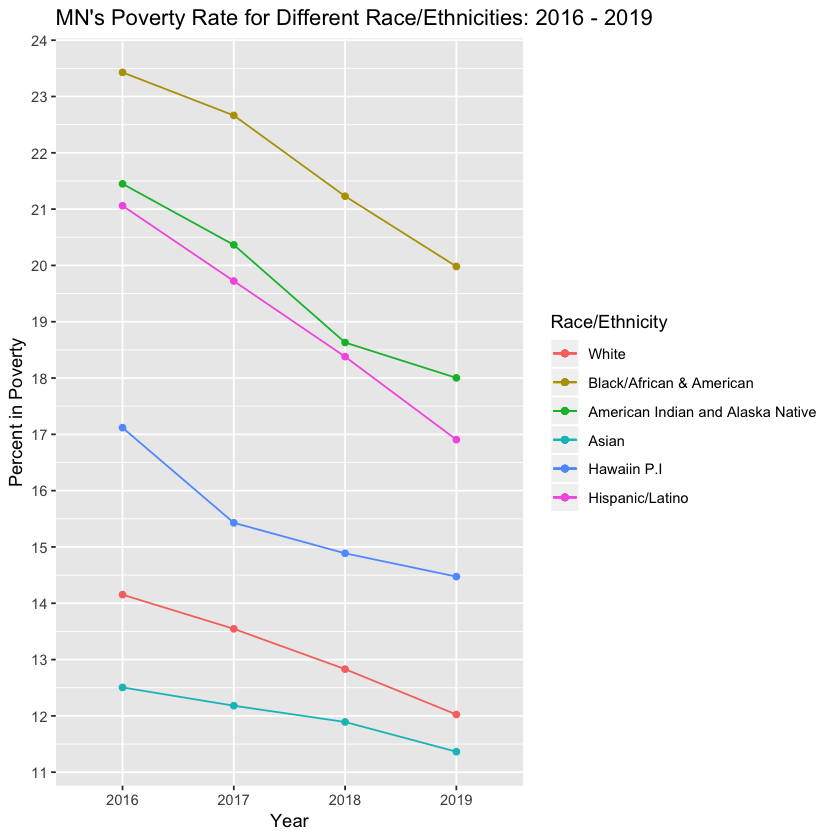

In [13]:
# Selecting different age groups that are below poverty for 2016, 2017, 2019.
race16 = select(ca_demo2016, 'white_alone', 'black_or_african_american', 'american_indian_and_alaska_native',
               'asian', 'native_hawaiian_pacific_islander', 
                'some_other_race_alone', 'two_or_more_races','hispanic_or_latino_origin')

race17 = select(ca_demo2017, 'white_alone', 'black_or_african_american', 'american_indian_and_alaska_native',
               'asian', 'native_hawaiian_pacific_islander', 
                'some_other_race_alone', 'two_or_more_races','hispanic_or_latino_origin')

race18 = select(ca_demo2018, 'white_alone', 'black_or_african_american', 'american_indian_and_alaska_native',
               'asian', 'native_hawaiian_pacific_islander', 
                'some_other_race_alone', 'two_or_more_races','hispanic_or_latino_origin')

race19 = select(ca_demo2019, 'white_alone', 'black_or_african_american', 'american_indian_and_alaska_native',
               'asian', 'native_hawaiian_pacific_islander', 
                'some_other_race_alone', 'two_or_more_races','hispanic_or_latino_origin')


scale_race16 = (race16*ca$pop2016)
scale_race17 = (race17*ca$pop2017)
scale_race18 = (race18*ca_demo2018$pop2018)
scale_race19 = (race19*ca$pop_2019)

r1 = c(sum(scale_race16$white_alone)/total_16, 
       sum(scale_race17$white_alone)/total_17,
       sum(scale_race18$white_alone)/total_18,
       sum(scale_race19$white_alone)/total_19)

r2 = c(sum(scale_race16$black_or_african_american)/total_16, 
       sum(scale_race17$black_or_african_american)/total_17, 
       sum(scale_race18$black_or_african_american)/total_18, 
       sum(scale_race19$black_or_african_american)/total_19)

r3 = c(sum(scale_race16$american_indian_and_alaska_native)/total_16,
       sum(scale_race17$american_indian_and_alaska_native)/total_17,
       sum(scale_race18$american_indian_and_alaska_native)/total_18, 
       sum(scale_race19$american_indian_and_alaska_native)/total_19)

r4 = c(sum(scale_race16$asian)/total_16,
       sum(scale_race17$asian)/total_17,
       sum(scale_race18$asian)/total_18, 
       sum(scale_race19$asian)/total_19)

r5 = c(sum(scale_race16$native_hawaiian_pacific_islander)/total_16,
       sum(scale_race17$native_hawaiian_pacific_islander)/total_17,
       sum(scale_race18$native_hawaiian_pacific_islander)/total_18, 
       sum(scale_race19$native_hawaiian_pacific_islander)/total_19)

r6 = c(sum(scale_race16$hispanic_or_latino_origin)/total_16,
       sum(scale_race17$hispanic_or_latino_origin)/total_17,
       sum(scale_race18$hispanic_or_latino_origin)/total_18, 
       sum(scale_race19$hispanic_or_latino_origin)/total_19); 

# Each year the data was collected
Year = c("2016", "2017", "2018", "2019")

# Dataframe of the data
df2 = data.frame(Year, r1, r2, r3, r4, r5, r6)



p2 <- ggplot(data = df2, aes(x = Year)) +
        # "MN's Poverty Rate Race: White"
        geom_point(aes(y = r1*100, color = "r1", group = 1)) +
        geom_line(aes(y = r1*100, color = "r1", group = 1)) +

        # "MN's Poverty Rate Race: Black or African and American"
        geom_point(aes(y = r2*100, color = "r2", group = 1)) +
        geom_line(aes(y = r2*100, color = "r2", group = 1)) +

        # "MN's Poverty Rate Race: American Indian and Alaska Native"
        geom_point(aes(y = r3*100, color = "r3", group = 1)) +
        geom_line(aes(y = r3*100, color = "r3", group = 1)) +
    
        # "MN's Poverty Rate Race: Asian"
        geom_point(aes(y = r4*100, color = "r4", group = 1)) +
        geom_line(aes(y = r4*100, color = "r4", group = 1)) +
        
        # "MN's Poverty Rate Race: Native Hawaiian Pacific Islander"
        geom_point(aes(y = r5*100, color = "r5", group = 1)) +
        geom_line(aes(y = r5*100, color = "r5", group = 1)) +
        
        # "MN's Poverty Rate Race: Hispanic or Latino"
        geom_point(aes(y = r6*100, color = "r6", group = 1)) +
        geom_line(aes(y = r6*100, color = "r6", group = 1)) +
        scale_colour_discrete(name  = "Race/Ethnicity",
                            breaks=c("r1", "r2", "r3", "r4", "r5", "r6"),
                            labels=c("White", "Black/African & American", 
                                     "American Indian and Alaska Native", "Asian", 
                                     "Hawaiin P.I","Hispanic/Latino")) +
        scale_y_continuous(breaks=seq(0, 100, 1)) + ylab("Percent in Poverty") +
        ggtitle("MN's Poverty Rate for Different Race/Ethnicities: 2016 - 2019")

p2

### Education Difference within Ethnic groups that are Poor ###

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

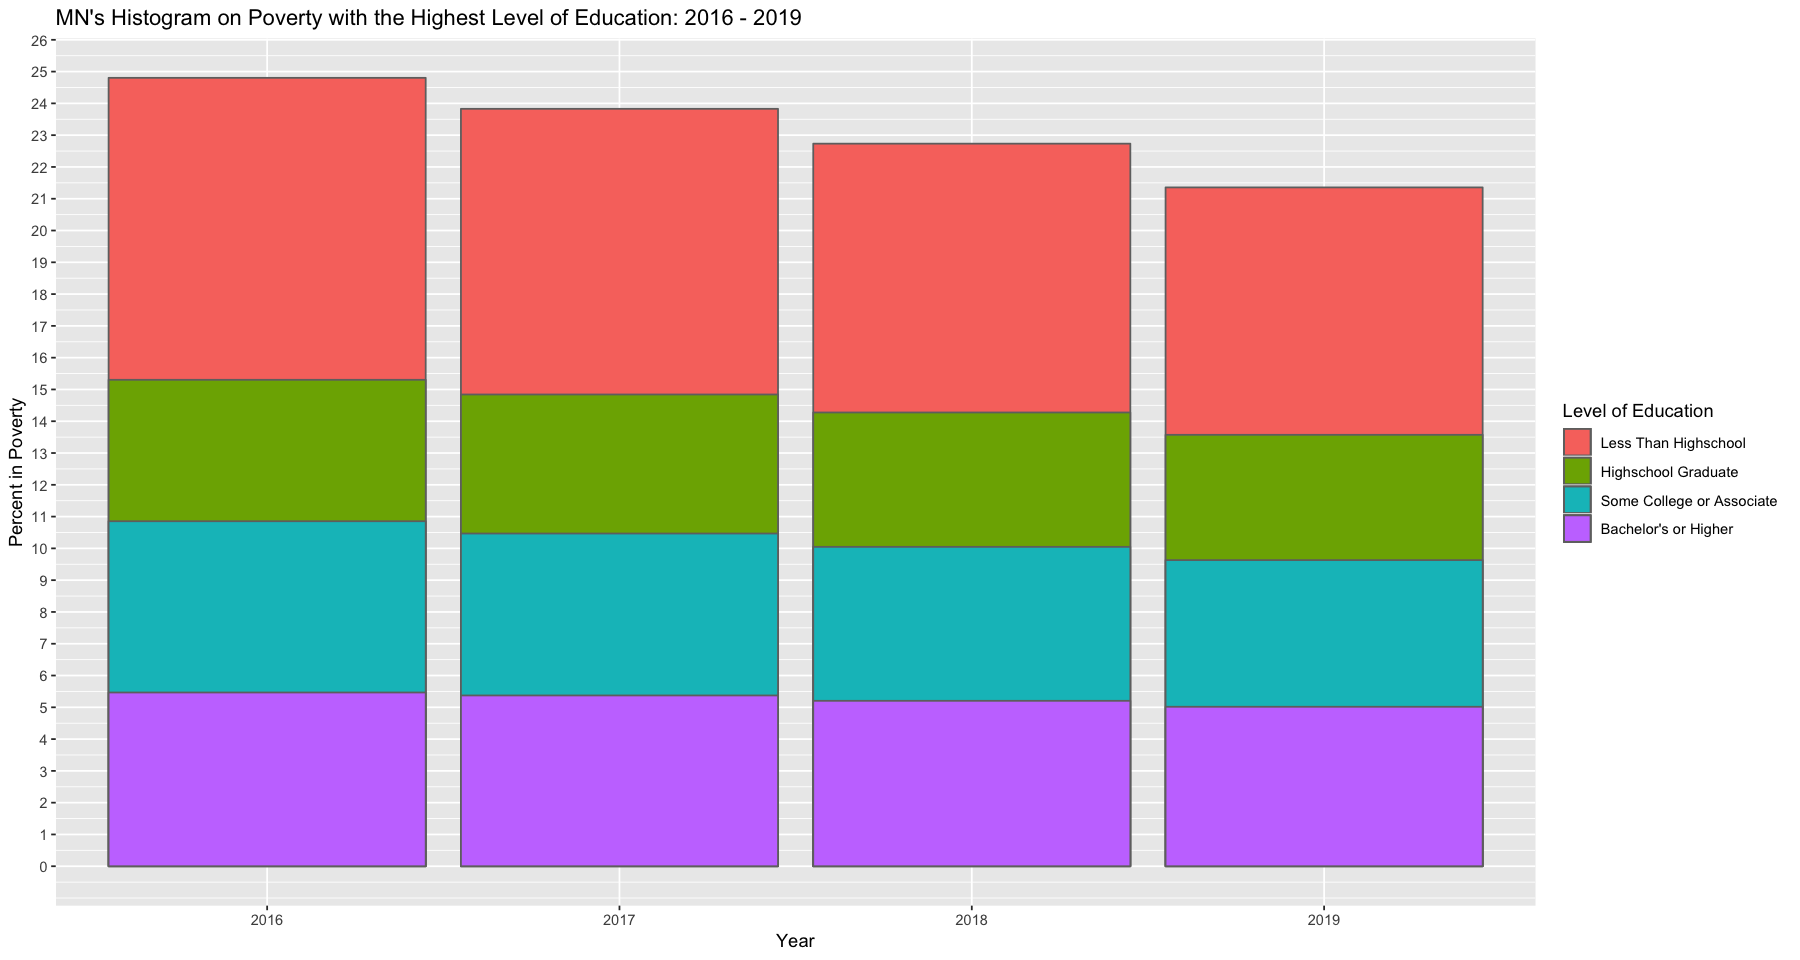

In [25]:
education16 = select(ca_demo2016, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')
education17 = select(ca_demo2017, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')
education18 = select(ca_demo2018, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')
education19 = select(ca_demo2019, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')

scale_edu16 = (education16*ca$pop2016)
scale_edu17 = (education17*ca$pop2017)
scale_edu18 = (education18*ca_demo2018$pop2018)
scale_edu19 = (education19*ca$pop_2019)

education16 = select(ca_demo2016, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')
education17 = select(ca_demo2017, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')
education18 = select(ca_demo2018, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')
education19 = select(ca_demo2019, 'less_than_hs_graduate', 'hs_graduate', 
                   'some_college_or_associate', 'bachelor_or_higher')

scale_edu16 = (education16*ca$pop2016)
scale_edu17 = (education17*ca$pop2017)
scale_edu18 = (education18*ca_demo2018$pop2018)
scale_edu19 = (education19*ca$pop_2019)

e1 = c(sum(scale_edu16$less_than_hs_graduate)/total_16, 
       sum(scale_edu17$less_than_hs_graduate)/total_17,
       sum(scale_edu18$less_than_hs_graduate)/total_18,
       sum(scale_edu19$less_than_hs_graduate)/total_19)

e2 = c(sum(scale_edu16$hs_graduate)/total_16, 
       sum(scale_edu17$hs_graduate)/total_17, 
       sum(scale_edu18$hs_graduate)/total_18, 
       sum(scale_edu19$hs_graduate)/total_19)

e3 = c(sum(scale_edu16$some_college_or_associate)/total_16,
       sum(scale_edu17$some_college_or_associate)/total_17,
       sum(scale_edu18$some_college_or_associate)/total_18, 
       sum(scale_edu19$some_college_or_associate)/total_19)

e4 = c(sum(scale_edu16$bachelor_or_higher)/total_16,
       sum(scale_edu17$bachelor_or_higher)/total_17,
       sum(scale_edu18$bachelor_or_higher)/total_18, 
       sum(scale_edu19$bachelor_or_higher)/total_19)

# Each year the data was collected
Year = c("2016", "2017", "2018", "2019")

# Dataframe of the data
df3 = data.frame(Year, e1, e2, e3, e4)



p3 <- ggplot(data = df3, aes(x = Year)) +
        # "MN's Poverty Rate Education Level: Less Than Highschool"
        geom_histogram(aes(y = e1*100, fill = "e1"), color = "grey44", stat = 'identity') +

        # "MN's Poverty Rate Educaton Level: Highschool Graduate"
        geom_histogram(aes(y = e2*100, fill = "e2"), color = "grey44", stat = 'identity') +

        # "MN's Poverty Rate Educaton Level: Some College or Associate"
        geom_histogram(aes(y = e3*100, fill = "e3"), color = "grey44", stat = 'identity') +
    
        # "MN's Poverty Rate Educaton Level: Bachelor's or Higher"
        geom_histogram(aes(y = e4*100, fill = "e4"), color = "grey44", stat = 'identity') +

        scale_fill_discrete(name  = "Level of Education",
                            breaks=c("e1", "e2", "e3", "e4", "e5", "e6"),
                            labels=c("Less Than High school", "High school Graduate", 
                                     "Some College or Associate", "Bachelor's or Higher", 
                                     "Hawaiin P.I","Hispanic/Latino")) +
        scale_y_continuous(breaks=seq(0, 100, 1)) + ylab("Percent in Poverty") +
        ggtitle("MN's Histogram on Poverty with the Highest Level of Education: 2016 - 2019")
p3